# Neural Networks y LSTM

<b>Neural Networks</b> son un conjunto de algoritmos que en cierto modo, imitan el cerebro humano y son diseñadas para reconocer patrones. Se encargan de <b>interpretar datos sensoriales</b> a través de una máquina perceptora, etiquetando o clusterizando el input en bruto. Existen capas y neuronas que en su conjunto interconectadas forman redes neuronales. La red puede ingerir grandes cantidades de datos y procesarlos a través de la diferentes capas, incrementando el aprendizaje. Pueden reconocer <b> patrones numéricos </b>, contenidos en vectores (previa transformación del texto, imagen, sonido o serie temporal), aprender si es correcto y usar lo aprendido para realizar predicciones sobre nuevos datos.

### Recurrent Neural Network y LSTM en finanzas

La red neuronal recurrente es una generalización de la red neuronal de alimentación directa que tiene una <b>memoria interna</b>. Se trata de una red neuronal multicapa que almacena información en nodos, permitiendo aprender secuencias en los datos.

Las LSTM (Long Short-Term Memory) es una <b>variante modificada de RNN</b>, que facilita recordar los datos pasados almacenados en la memoria. Sus aplicaciones son elevadas, sobre todo en problemas de clasificación, procesamiento y predicción de series temporales dados retardos temporales de duración desconocida. El modelo entrena mediante la técnica de back-propagation.

### ¿Cómo funciona una LSTM?

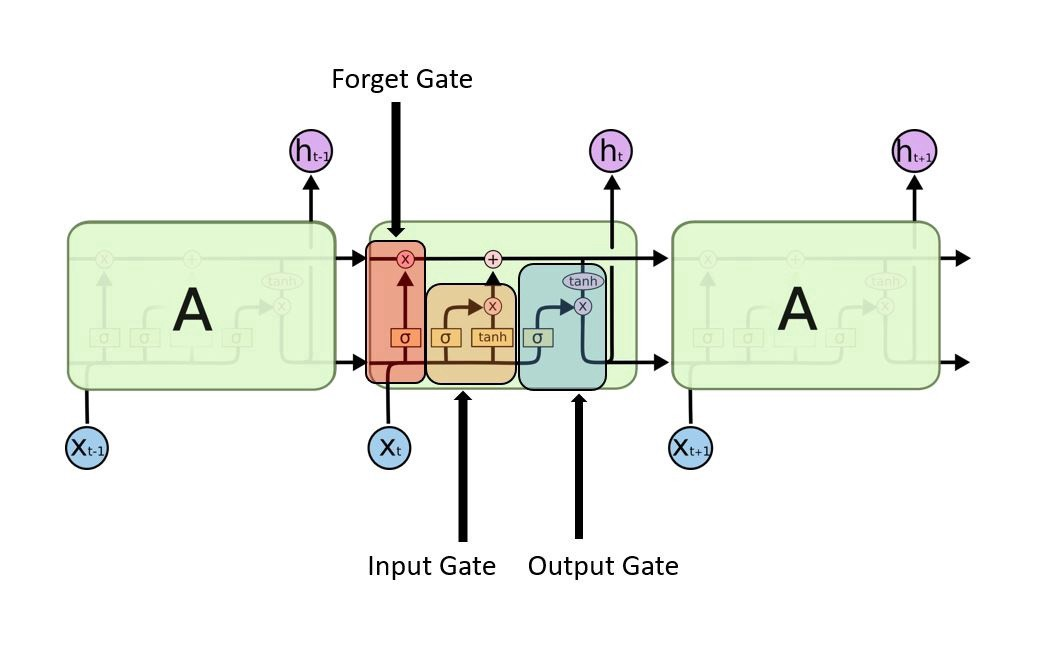

In [1]:
from IPython.display import Image
Image(filename=r'C:\Users\jmruizr\Downloads\lstm.jpeg')

<b>1. Input Gate: </b> decide que valor del input se podría utilizar para modificar la memoria. La decisión la toma la función <b>sigmoid</b> con posibles valores 0,1 y la función <b>tanh </b> asigna un peso a los valores que pasan estableciendo un nivel de importancia entre -1 y 1.

<b>2. Forget Gate: </b> establece que detalles se deben olvidar de la celda. Lo decide la función <b>sigmoid</b> basándose en el estado de la celda previa y la información de la actual.

<b>2. Output Gate: </b> el input y la memoria de la celda se usan para decidir el output. La función <b>sigmoid</b> decide que valores pasan y la función <b>tanh </b> asigna un peso dando un nivel de importancia entre -1 y 1.



### Predicción de liquidez del sistema bancario privado argentino

La liquidez se define como:

<b>Liquidez :</b> fondos disponibles/Total depósitos a corto plazo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
datos = pd.read_csv(r'C:\Users\jmruizr\Downloads\datos-principales-indicadores-sistema-financiero-mensuales.csv')

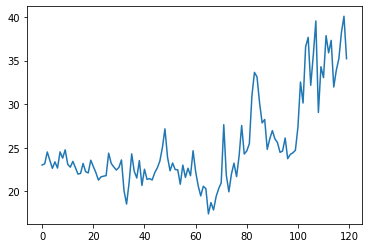

In [5]:
datos_ = datos['bancos_priv_nacionales_2_liquidez']
plt.plot(datos_)
plt.show()

#### Normalización de los datos

In [6]:
datos_  = datos_.values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(datos_)

#### Split en train y test

In [7]:
len_train = int(len(dataset) * 0.80)
len_test = len(dataset) - len_train
train, test = dataset[0:len_train,:], dataset[len_train:len(dataset),:]

In [8]:
def create_dataset_with_lags(dataset, back_step=1):
    X, Y = [], []
    for i in range(len(dataset)-back_step-1):
        aux_ = dataset[i:(i+back_step), 0]
        X.append(aux_)
        Y.append(dataset[i + back_step, 0])
    return np.array(X), np.array(Y)

In [9]:
back_step = 1
X_train, y_train = create_dataset_with_lags(train, back_step)
X_test, y_test = create_dataset_with_lags(test, back_step)


In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [12]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, back_step)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 0s - loss: 0.0522
Epoch 2/100
 - 0s - loss: 0.0201
Epoch 3/100
 - 0s - loss: 0.0136
Epoch 4/100
 - 0s - loss: 0.0126
Epoch 5/100
 - 0s - loss: 0.0120
Epoch 6/100
 - 0s - loss: 0.0117
Epoch 7/100
 - 0s - loss: 0.0112
Epoch 8/100
 - 0s - loss: 0.0109
Epoch 9/100
 - 0s - loss: 0.0105
Epoch 10/100
 - 0s - loss: 0.0102
Epoch 11/100
 - 0s - loss: 0.0098
Epoch 12/100
 - 0s - loss: 0.0096
Epoch 13/100
 - 0s - loss: 0.0093
Epoch 14/100
 - 0s - loss: 0.0091
Epoch 15/100
 - 0s - loss: 0.0087
Epoch 16/100
 - 0s - loss: 0.0085
Epoch 17/100
 - 0s - loss: 0.0082
Epoch 18/100
 - 0s - loss: 0.0081
Epoch 19/100
 - 0s - loss: 0.0079
Epoch 20/100
 - 0s - loss: 0.0077
Epoch 21/100
 - 0s - loss: 0.0075
Epoch 22/100
 - 0s - loss: 0.0074
Epoch 23/100
 - 0s - loss: 0.0073
Epoch 24/100
 - 0s - loss: 0.0072
Epoch 25/100
 - 0s - loss: 0.0070
Epoch 26/100
 - 0s - loss: 0.0069
Epoch 27/100
 - 0s - loss: 0.0069
Epoch 28/100
 - 0s - loss: 0.0069
Epoch 29/100
 - 0s - loss: 0.0067
Epoch 30/100
 - 0s - lo

#### Predictions

In [13]:
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)
# invert predictions
train_prediction = scaler.inverse_transform(train_prediction)
y_train = scaler.inverse_transform([y_train])
test_prediction = scaler.inverse_transform(test_prediction)
y_test = scaler.inverse_transform([y_test])

#### Score

In [14]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], train_prediction[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], test_prediction[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.79 RMSE
Test Score: 4.60 RMSE


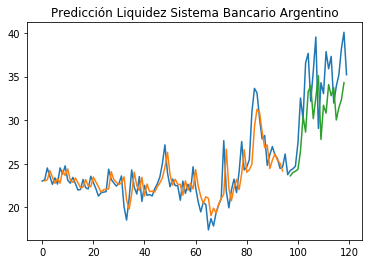

Start date: 2010-01-01
End date: 2019-12-01


In [39]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[back_step:len(train_prediction)+back_step, :] = train_prediction

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_prediction)+(back_step*2)+1:len(dataset)-1, :] = test_prediction

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Predicción Liquidez Sistema Bancario Argentino')
plt.show()
print('Start date:',datos['indice_tiempo'].min())
print('End date:',datos['indice_tiempo'].max())

### Bibliografía

https://datos.gob.ar/dataset/sspm-principales-indicadores-sistema-financiero/archivo/sspm_332.1